# <center>Learning how to play Space Invaders with RL.</center>

![space invaders poster image](https://cdn-images-1.medium.com/max/1200/1*Ya6drllhmC82yh0J-elrPA.jpeg)

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10442922240495773596
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3061186560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5765713321516736557
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
import gym
import numpy as np
from dqn.model import ModelVanilla
from dqn.train import Train 
from dqn.dqnAgent import DQNAgent
import matplotlib.pyplot as plt

from gym.wrappers.atari_preprocessing import AtariPreprocessing
from baselines.common.atari_wrappers import NoopResetEnv, MaxAndSkipEnv, wrap_deepmind

Using TensorFlow backend.


In [3]:
env = gym.make('SpaceInvaders-v0')

env = NoopResetEnv(env)
env = MaxAndSkipEnv(env)
env = wrap_deepmind(env, episode_life=False, clip_rewards=False, frame_stack=True, scale=False)

**Observation space**: the observation space consists on 3 sequential images of size 210x160

**Action space**: there are 6 possible actions: *left, right, shoot, left-shoot, right-shoot, do nothing*.

In [4]:
print(env.observation_space.shape)
print(env.action_space)

(84, 84, 4)
Discrete(6)


### Agent acting randomly

In [5]:
from tqdm import tqdm

reward_random = []

for i in tqdm(range(500)):
    total_reward = 0
    env.reset()
    while True:
        #env.render()
        next_state, reward, done, info = env.step((env.action_space.sample())) # select random action
        total_reward += reward
        if done:
            reward_random.append(total_reward)
            break

    env.close()
    
print("Average score over a {} episodes: {}".format(500, np.asarray(reward_random).mean()))

  2%|▏         | 10/500 [00:03<02:26,  3.35it/s]


KeyboardInterrupt: 

### State sequence

Each state will look like a sequence of 4 frames. Every frame is cropped and preprocessed for faster and more efficient computations.

(4, 84, 84)


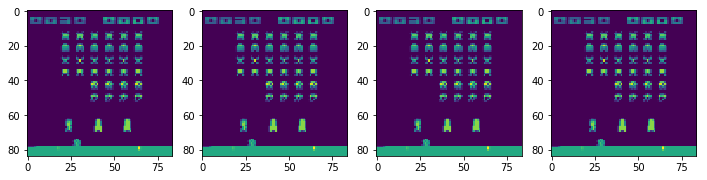

In [6]:
#env.reset()

# Create a new state
next_state, reward, done, info = env.step((env.action_space.sample())) # select random action

print(np.asarray(next_state).transpose(2, 0, 1).shape)
# Plot the state
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
ax = axes.ravel()

for i, frame in enumerate(np.asarray(next_state).transpose(2, 0, 1)):
    ax[i].imshow(frame)

### Establishing a benchmark

I'll be using two benchmarks:
* The performance of an agent without training over 100 games
* The performance of a human
    * My avg performance over 50 games: 520
    * Avg performance of profesional tester according to DeepMind's Paper: 1652

In [8]:
episodes_eval = 500
agent_bench = DQNAgent()
benchmark = Train(env, agent_bench)

# Evaluate performance
benchmark.train(episodes_eval, learn=False, render=False)

# Plot rewards
benchmark.plot_rewards()

 score: 160.0:   2%|▏         | 9/500 [00:02<02:39,  3.07it/s]

KeyboardInterrupt: 

## Training

 score: 110.0: 100%|██████████| 100/100 [01:31<00:00,  1.02it/s] 

Average score: 161.0


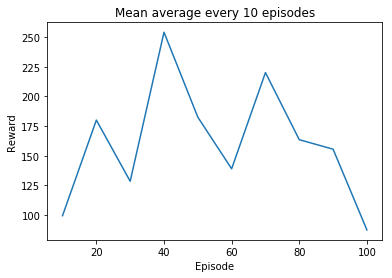

Average score: 161.0


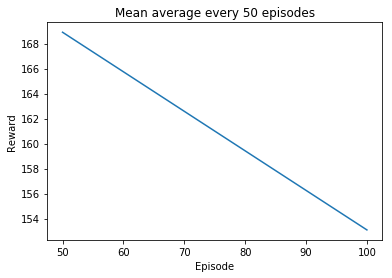

Average score: 161.0


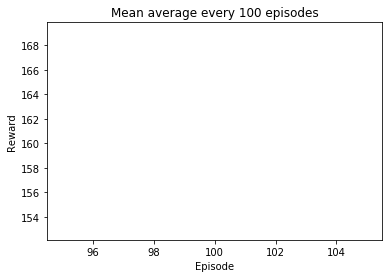

In [5]:
episodes_train = 100
agent_train = DQNAgent(dueling=False)
# Load existing saved weights
# Comment if don't want to load pre-trained weights
#agent_train.load_weights('best_model_dueling')

train = Train(env, agent_train)
# Train the agent
train.train(episodes_train, learn=True, render=False)

# Plot rewards
train.plot_rewards(mean_avg=10)
train.plot_rewards(mean_avg=50)
train.plot_rewards(mean_avg=100)

Average score: 161.0


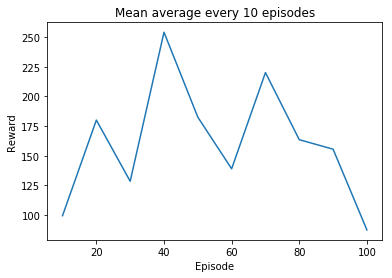

Average score: 161.0


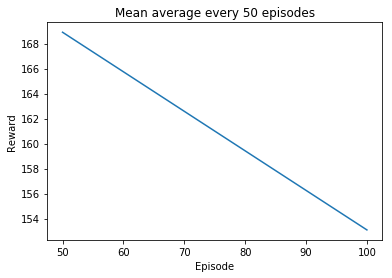

Average score: 161.0


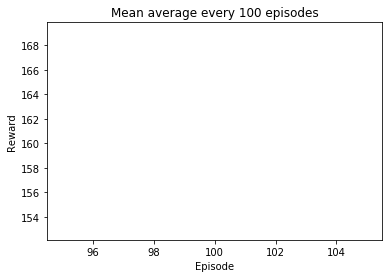

In [7]:
train.load_rewards()

# Plot rewards
train.plot_rewards(mean_avg=10)
train.plot_rewards(mean_avg=50)
train.plot_rewards(mean_avg=100)

In [5]:
# Evaluate the trained agent
episodes_eval = 500

# agent_trained = train.agent
agent_trained = DQNAgent(dueling=False)
agent_trained.load_weights('vanilla')
evaluation = Train(env, agent_trained)

# Evaluate performance
evaluation.train(episodes_eval, learn=False, render=False, monitor=True)

# Plot rewards
evaluation.plot_rewards(mean_avg=10)

 score: 90.0:  16%|█▌        | 80/500 [00:28<02:36,  2.68it/s] 

KeyboardInterrupt: 

In [9]:
train.rewards

[45.0,
 40.0,
 240.0,
 185.0,
 200.0,
 35.0,
 65.0,
 75.0,
 125.0,
 75.0,
 60.0,
 165.0,
 110.0,
 100.0,
 95.0,
 180.0,
 125.0,
 110.0,
 75.0,
 115.0,
 55.0,
 85.0,
 120.0,
 130.0,
 75.0,
 245.0,
 170.0,
 245.0,
 95.0,
 120.0,
 240.0,
 150.0,
 110.0,
 155.0,
 70.0,
 65.0,
 20.0,
 165.0,
 310.0,
 65.0,
 50.0,
 95.0,
 240.0,
 365.0,
 100.0,
 70.0,
 110.0,
 125.0,
 35.0,
 150.0,
 190.0,
 125.0,
 55.0,
 55.0,
 275.0,
 200.0,
 120.0,
 365.0,
 145.0,
 345.0,
 20.0,
 35.0,
 40.0,
 210.0,
 80.0,
 115.0,
 220.0,
 110.0,
 235.0,
 145.0,
 30.0,
 130.0,
 85.0,
 75.0,
 80.0,
 180.0,
 55.0,
 210.0,
 115.0,
 185.0,
 285.0,
 80.0,
 150.0,
 220.0,
 275.0,
 55.0,
 420.0,
 165.0,
 140.0,
 290.0,
 290.0,
 75.0,
 110.0,
 20.0,
 35.0,
 60.0,
 250.0,
 80.0,
 180.0,
 160.0]